# The Built-in Datasets and the Sequential API

In this module, we will

1. Learn about Toy Datasets available in the Keras Datasets library 
2. Build a FeedForward Model using the Sequential API
3. Evaluate and Predict Unknown Images

In [1]:
# imports 
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


## Exploring the Dataset

In this module, we are using the famous MINST digit dataset; however, the keras datasets library contains other [datasets](https://keras.io/api/datasets/) as well. You are advised to explore them and learn using them.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalizing the Data
x_train, x_test = x_train/255.0, x_test/255.0

**Let's explore the dataset**

In [3]:
num_x_train = x_train.shape[0]
x_train_dim = x_train.shape[1:]

num_x_test = x_test.shape[0]
x_test_dim = x_train.shape[1:]

print('There are {} train images of size : {}.\n'.format(num_x_train, x_train_dim))
print('There are {} test images of size : {}.\n'.format(num_x_test, x_test_dim))

There are 60000 train images of size : (28, 28).

There are 10000 test images of size : (28, 28).



**Let's view some of the images**

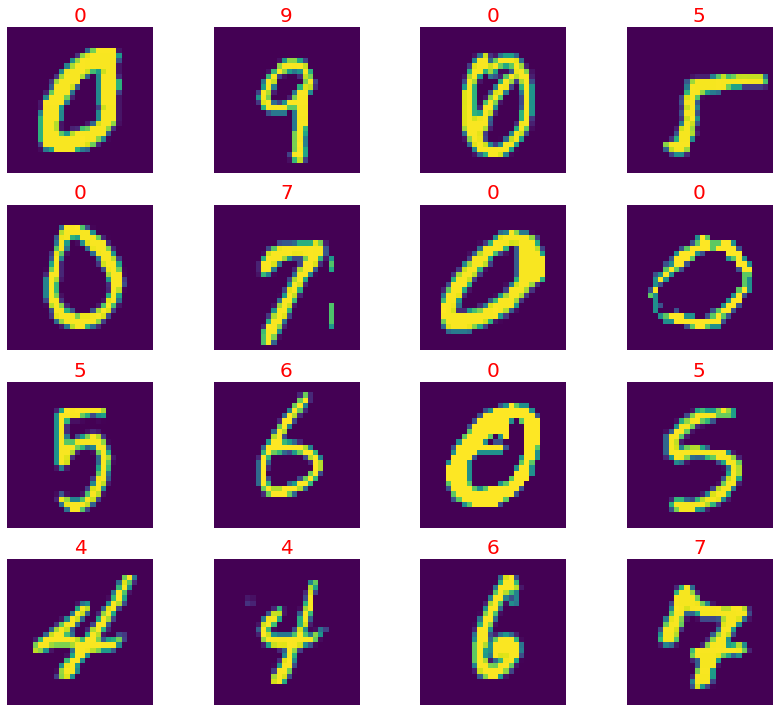

In [4]:
import matplotlib.pyplot as plt

np.random.seed(1)
indices = np.random.randint(0, 60000, size = 16)
plt.figure(figsize = (12, 10))
for i, index in enumerate(indices):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[index,:])
  plt.title(y_train[index], fontsize= 20, color= "red")
  plt.axis('off')
  
plt.tight_layout()

***
The above images are of sizes $(28, 28)$; whereas, the nerual network models we have learnt so far required flat inputs. Therefore, first, we will convert each image of size $(28, 28)$ into arrays of dimensions $(1, 784)$.
***

## Build a Sequential Model

In [5]:
model = Sequential(name = 'Sequential-Model')

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 64, activation= tf.nn.relu,  name = 'Layer-1'))
model.add(Dense(units = 32, activation=tf.nn.relu, name = 'Layer-2'))
model.add(Dense(units = 10, activation = tf.nn.softmax, name = 'Output-Layer'))
print(model.summary())

Model: "Sequential-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Layer-1 (Dense)              (None, 64)                50240     
_________________________________________________________________
Layer-2 (Dense)              (None, 32)                2080      
_________________________________________________________________
Output-Layer (Dense)         (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
None


**Compiling the Model:**

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

**Training the Model:**

In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.9117 - val_loss: 0.1600 - val_accuracy: 0.9509
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1388 - accuracy: 0.9588 - val_loss: 0.1218 - val_accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1011 - accuracy: 0.9689 - val_loss: 0.0979 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9746 - val_loss: 0.0965 - val_accuracy: 0.9719
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 0.1024 - val_accuracy: 0.9711
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.1034 - val_accuracy: 0.9694
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0935 - val_accuracy:

**Plotting the Loss and Accuracy**

In [8]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.301432,0.911733,0.159952,0.9509
1,0.138849,0.958767,0.121838,0.9638
2,0.101076,0.968867,0.097912,0.9702
3,0.080024,0.974617,0.096539,0.9719
4,0.067317,0.978767,0.102435,0.9711


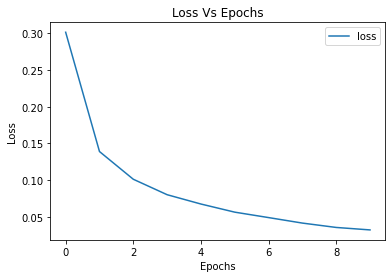

In [9]:
loss_plot = df.plot(y = 'loss', title = 'Loss Vs Epochs', legend = True)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss");

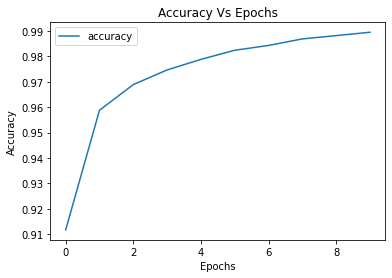

In [10]:
accuracy_plot = df.plot(y = 'accuracy', title = 'Accuracy Vs Epochs', legend = True)
accuracy_plot.set(xlabel = "Epochs", ylabel = "Accuracy");

***
### Prediction

Let's predict a few randomly selected images from the test dataset.

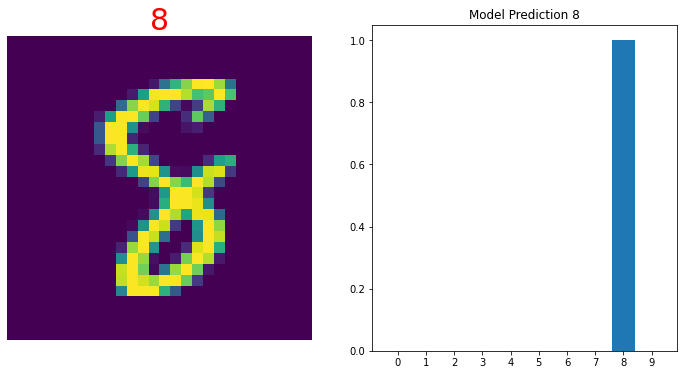

In [11]:
random_index = np.random.choice(x_test.shape[0])
image = x_test[random_index,:]
label = y_test[random_index]

predictions = model.predict(image[np.newaxis, :,:])

fig, axes = plt.subplots(1, 2, figsize = (12, 6))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title(label, fontsize = 30, color = 'red')
axes[1].bar(np.arange(predictions.shape[1]),predictions.squeeze())
axes[1].set_xticks(np.arange(predictions.shape[1]))
axes[1].set_title('Model Prediction {}'.format(np.argmax(predictions), color = 'red', fontsize = 30))
plt.show()